In [1]:
import pandas as pd
from datetime import datetime
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### General variables

In [2]:
data_folder = '../../../Data/' #add your own folder name where the csv files are located
print_text_result = False
raw_data_names = ['pit1_data-2022', 'pit2_data-2022', 'pit3_data-2022', 'pit4_data-2022',
                  'pit1_data-2023', 'pit2_data-2023', 'pit3_data-2023', 'pit4_data-2023']
clean_data_names = ['VII_PIT1_2022', 'VII_PIT2_2022', 'VII_PIT3_2022', 'VII_PIT4_2022']

### Helper functions

In [3]:
def remove_pit_suffix(name: str) -> str:
    """
    Remove suffix '_pit<number>' from header
    """
    re_match = re.search(r'_pit\d+$', name)
    if re_match:
        name = name[:re_match.start()]

    return name

def get_mixed_year_dates(df: pd.DataFrame, file_name: str, findings_dict: dict) -> int:
    header = f'{file_name} year not matching'
    start_date_2022 = datetime(2022, 1,1, 0, 0, 0)
    start_date_2023 = datetime(2023, 1,1, 0, 0, 0)
    start_date_2024 = datetime(2024, 1,1, 0, 0, 0)

    if '2022' in file_name:
        findings_dict[header] = (df.loc[(df['TIMESTAMP'] >= start_date_2023) | (df['TIMESTAMP'] < start_date_2022)].index.values + 2)
    else:
        findings_dict[header] = (df.loc[(df['TIMESTAMP'] >= start_date_2024) | (df['TIMESTAMP'] < start_date_2023)].index.values + 2 )

    return len(findings_dict[header])


def get_duplicate_dates(df: pd.DataFrame, file_name: str, findings_dict: dict) -> pd.DataFrame:
    header = f'{file_name} duplicate date'
    findings_dict[header] = (df[df['TIMESTAMP'].duplicated() == True].index.values + 2)

    return len(findings_dict[header])

def get_missing_values(df: pd.DataFrame, file_name: str, findings_dict: dict) -> pd.DataFrame:
    header = f'{file_name} missing values'
    findings_dict[header] = df[df.isnull().any(axis=1)].index.values + 2
    header2 = f'{file_name} missing values col name'
    findings_dict[header2] = df.columns[df.isnull().any()].tolist()

    return len(findings_dict[header])

def get_findings(df: pd.DataFrame, file_name: str, findings_dict: dict) -> dict:
    diff_dict = dict()
    diff_dict['Date_no_match'] = get_mixed_year_dates(df, file_name, findings_dict)
    diff_dict['Duplicates'] = get_duplicate_dates(df, file_name, findings_dict)
    diff_dict['NaNs'] = get_missing_values(df, file_name, findings_dict)

    return diff_dict

def load_data(file_names: list[str], data_folder: str, findings_dict: dict) -> dict:
    dfs = dict()
    
    report_df = pd.DataFrame()

    for file_name in file_names:
        df = pd.read_csv(data_folder+file_name+'.csv', parse_dates=['TIMESTAMP'])
        df.rename(mapper=remove_pit_suffix, axis='columns', inplace=True)

        stats = get_findings(df, file_name, findings_dict)
        report_df = pd.concat([report_df, pd.DataFrame(stats, index=[file_name])])
        dfs[file_name] = df

    report_df = report_df.assign(Total = lambda x: (x.sum(axis=1)))
    report_df['row_cnt'] = [len(df) for df in dfs.values()]
    print(report_df)

    return dfs

### Load data and get findings

In [4]:
findings_dict = dict()
raw_data = load_data(raw_data_names, data_folder, findings_dict)
clean_data = load_data(clean_data_names, data_folder, findings_dict)

/tmp/ipykernel_17507/3030246735.py:2: DtypeWarning: Columns (34,37) have mixed types.Specify dtype option on import or set low_memory=False.
  raw_data = load_data(raw_data_names, data_folder, findings_dict)


/tmp/ipykernel_17507/3030246735.py:2: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  raw_data = load_data(raw_data_names, data_folder, findings_dict)
/tmp/ipykernel_17507/3030246735.py:2: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  raw_data = load_data(raw_data_names, data_folder, findings_dict)
/tmp/ipykernel_17507/3030246735.py:2: DtypeWarning: Columns (7,8,9,34,37) have mixed types.Specify dtype option on import or set low_memory=False.
  raw_data = load_data(raw_data_names, data_folder, findings_dict)
/tmp/ipykernel_17507/3030246735.py:2: DtypeWarning: Columns (19,20,21,30,31,34,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  raw_data = load_data(raw_data_names, data_folder, findings_dict)


                Date_no_match  Duplicates  NaNs  Total  row_cnt
pit1_data-2022              1          12   267    280    75649
pit2_data-2022              1          24  4348   4373    75949
pit3_data-2022              1          12   167    180    27096
pit4_data-2022              1          12   125    138    27264
pit1_data-2023            287          15   279    581   104918
pit2_data-2023           3250       25839  7215  36304   133640
pit3_data-2023           1154          88   279   1521   106361
pit4_data-2023            290         196  1143   1629   105594


/tmp/ipykernel_17507/3030246735.py:3: DtypeWarning: Columns (37,38,47) have mixed types.Specify dtype option on import or set low_memory=False.
  clean_data = load_data(clean_data_names, data_folder, findings_dict)
/tmp/ipykernel_17507/3030246735.py:3: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  clean_data = load_data(clean_data_names, data_folder, findings_dict)
/tmp/ipykernel_17507/3030246735.py:3: DtypeWarning: Columns (37,47) have mixed types.Specify dtype option on import or set low_memory=False.
  clean_data = load_data(clean_data_names, data_folder, findings_dict)


               Date_no_match  Duplicates   NaNs  Total  row_cnt
VII_PIT1_2022              1         192  76117  76310    76117
VII_PIT2_2022              1          24  72388  72413    75949
VII_PIT3_2022              1          12  27094  27107    27096
VII_PIT4_2022              1          12  25225  25238    25225


### Save findings as a csv

Each column values are row index in the original csv

In [5]:
findigs_df = pd.DataFrame.from_dict(dict([ (k,pd.Series(v)) for k,v in findings_dict.items() ]))
# findigs_df.to_csv('Data_date_missmatch_duplicate_rows_and_null_values.csv')

### Check where redox values differ in raw and cleaned data and save as csv

Csv contains timestamp and redox values from both raw and cleaned data

In [6]:
# looping through 2022 data
mm_values = pd.Series()
for (raw_name, raw_df), (clean_name, clean_df) in zip(raw_data.items(), clean_data.items()):
    print('Comparing', raw_name, ' vs ', clean_name)
    
    cols = ['TIMESTAMP', 'Redox_Avg(1)', 'Redox_Avg(2)', 'Redox_Avg(3)', 'Redox_Avg(4)', 'Redox_Avg(5)']
    raw_compare = raw_df[cols]
    clean_compare = clean_df[cols]

    # merge Dataframes by matching TIMESTAMP
    merged_df = raw_compare.merge(clean_compare, how='inner', on=['TIMESTAMP'], suffixes=('_raw', '_clean'))

    matching_values = merged_df.apply(lambda x: True if (math.isnan(x['Redox_Avg(1)_clean']) or math.isclose(x['Redox_Avg(1)_raw'], x['Redox_Avg(1)_clean'], rel_tol=1e-3)) and
                                                        (math.isnan(x['Redox_Avg(2)_clean']) or math.isclose(x['Redox_Avg(2)_raw'], x['Redox_Avg(2)_clean'], rel_tol=1e-3)) and
                                                        (math.isnan(x['Redox_Avg(3)_clean']) or math.isclose(x['Redox_Avg(3)_raw'], x['Redox_Avg(3)_clean'], rel_tol=1e-3)) and
                                                        (math.isnan(x['Redox_Avg(4)_clean']) or math.isclose(x['Redox_Avg(4)_raw'], x['Redox_Avg(4)_clean'], rel_tol=1e-3)) and
                                                        (math.isnan(x['Redox_Avg(5)_clean']) or math.isclose(x['Redox_Avg(5)_raw'], x['Redox_Avg(5)_clean'], rel_tol=1e-3)) else False, axis=1)
    
    # Uncomment to check for larger gaps between the raw and clean values
    # matching_values = merged_df.apply(lambda x: True if (math.isnan(x['Redox_Avg(1)_clean']) or abs(x['Redox_Avg(1)_raw'] - x['Redox_Avg(1)_clean']) <= 10) and
    #                                                     (math.isnan(x['Redox_Avg(2)_clean']) or abs(x['Redox_Avg(2)_raw'] - x['Redox_Avg(2)_clean']) <= 10) and
    #                                                     (math.isnan(x['Redox_Avg(3)_clean']) or abs(x['Redox_Avg(3)_raw'] - x['Redox_Avg(3)_clean']) <= 10) and
    #                                                     (math.isnan(x['Redox_Avg(4)_clean']) or abs(x['Redox_Avg(4)_raw'] - x['Redox_Avg(4)_clean']) <= 10) and
    #                                                     (math.isnan(x['Redox_Avg(5)_clean']) or abs(x['Redox_Avg(5)_raw'] - x['Redox_Avg(5)_clean']) <= 10) else False, axis=1)
    
    if len(matching_values[matching_values == False]) > 0:
        print(f'\tFound {len(merged_df[matching_values == False])} missmatch with redox values')
        mm_values = matching_values.copy()
        # merged_df[matching_values == False].to_csv(f'Redox_value_not_same_{raw_name}_vs_{clean_name}')
    else:
        print('\tNO MISSMATCH')

/tmp/ipykernel_17507/1767773856.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mm_values = pd.Series()


Comparing pit1_data-2022  vs  VII_PIT1_2022
	NO MISSMATCH
Comparing pit2_data-2022  vs  VII_PIT2_2022
	NO MISSMATCH
Comparing pit3_data-2022  vs  VII_PIT3_2022
	Found 26533 missmatch with redox values
Comparing pit4_data-2022  vs  VII_PIT4_2022
	NO MISSMATCH


### Check if missmatch values are from another pit data

In [7]:
mm_data_name = 'pit3_data-2022'
mm_df = raw_data[mm_data_name].iloc[mm_values[mm_values == False].index.values]

for clean_name, clean_df in clean_data.items():
    print('Comparing', mm_data_name, ' vs ', clean_name)

    cols = ['TIMESTAMP', 'Redox_Avg(1)', 'Redox_Avg(2)', 'Redox_Avg(3)', 'Redox_Avg(4)', 'Redox_Avg(5)']
    raw_compare = mm_df[cols]
    clean_compare = clean_df[cols]

    # merge Dataframes by matching TIMESTAMP
    merged_df = raw_compare.merge(clean_compare, how='inner', on=['TIMESTAMP'], suffixes=('_raw', '_clean'))

    # matching_values = merged_df.apply(lambda x: True if (math.isnan(x['Redox_Avg(1)_clean']) or math.isclose(x['Redox_Avg(1)_raw'], x['Redox_Avg(1)_clean'], rel_tol=1e-3)) and
    #                                                     (math.isnan(x['Redox_Avg(2)_clean']) or math.isclose(x['Redox_Avg(2)_raw'], x['Redox_Avg(2)_clean'], rel_tol=1e-3)) and
    #                                                     (math.isnan(x['Redox_Avg(3)_clean']) or math.isclose(x['Redox_Avg(3)_raw'], x['Redox_Avg(3)_clean'], rel_tol=1e-3)) and
    #                                                     (math.isnan(x['Redox_Avg(4)_clean']) or math.isclose(x['Redox_Avg(4)_raw'], x['Redox_Avg(4)_clean'], rel_tol=1e-3)) and
    #                                                     (math.isnan(x['Redox_Avg(5)_clean']) or math.isclose(x['Redox_Avg(5)_raw'], x['Redox_Avg(5)_clean'], rel_tol=1e-3)) else False, axis=1)
    # Uncomment to check for larger gaps between the raw and clean values
    matching_values = merged_df.apply(lambda x: True if (math.isnan(x['Redox_Avg(1)_clean']) or abs(x['Redox_Avg(1)_raw'] - x['Redox_Avg(1)_clean']) <= 50) and
                                                        (math.isnan(x['Redox_Avg(2)_clean']) or abs(x['Redox_Avg(2)_raw'] - x['Redox_Avg(2)_clean']) <= 50) and
                                                        (math.isnan(x['Redox_Avg(3)_clean']) or abs(x['Redox_Avg(3)_raw'] - x['Redox_Avg(3)_clean']) <= 50) and
                                                        (math.isnan(x['Redox_Avg(4)_clean']) or abs(x['Redox_Avg(4)_raw'] - x['Redox_Avg(4)_clean']) <= 50) and
                                                        (math.isnan(x['Redox_Avg(5)_clean']) or abs(x['Redox_Avg(5)_raw'] - x['Redox_Avg(5)_clean']) <= 50) else False, axis=1)

    if len(matching_values[matching_values == False]) > 0:
        print(f'\tNO MATCH')
    else:
        print(f'\tData is from pit {clean_name}')


Comparing pit3_data-2022  vs  VII_PIT1_2022


	NO MATCH
Comparing pit3_data-2022  vs  VII_PIT2_2022
	NO MATCH
Comparing pit3_data-2022  vs  VII_PIT3_2022
	NO MATCH
Comparing pit3_data-2022  vs  VII_PIT4_2022
	NO MATCH


### See if raw data has missing values on timestamps where clean data has redox error flag

In [8]:
# looping through 2022 data
for (raw_name, raw_df), (clean_name, clean_df) in zip(raw_data.items(), clean_data.items()):
    print('Comparing', raw_name, ' vs ', clean_name)

    error_flags_timestamp = clean_df[clean_df['Redox_error_flag'] == True]['TIMESTAMP'].to_numpy()
    raw_data_points_with_error_flag = raw_df.loc[raw_df['TIMESTAMP'].isin(error_flags_timestamp) == True]
    raw_data_missing_values = raw_data_points_with_error_flag[raw_data_points_with_error_flag.isnull().any(axis=1)]

    if len(raw_data_missing_values) > 0:
        cols_with_missing_data = raw_data_missing_values.columns[raw_data_missing_values.isnull().any()].tolist()
        cols = ' ,'.join(cols_with_missing_data)
        print(f'\tColumns with missing values {cols}')
        print(f'\tTotal rows {len(raw_data_missing_values)}')
        rows_index = ' ,'.join(map(str, raw_data_missing_values.index.values+2))
        print(f'\tRow index {rows_index}')
        print('\tRaw data:')
        vals = raw_data_missing_values[['Redox_Avg(1)', *cols_with_missing_data]]
        print(f'{vals}')
        print('\tClean data:')
        vals = clean_df[['Redox_Avg(1)', *cols_with_missing_data]].iloc[raw_data_missing_values.index.values]
        print(f'{vals}')
    else:
        print('\tNO MISSING VALUES FOR REDOX ERROR')

    

Comparing pit1_data-2022  vs  VII_PIT1_2022
	NO MISSING VALUES FOR REDOX ERROR
Comparing pit2_data-2022  vs  VII_PIT2_2022
	Columns with missing values Redox_Avg(2) ,Redox_Avg(3) ,Redox_Avg(4) ,Redox_Avg(5)
	Total rows 2
	Row index 60556 ,60557
	Raw data:
       Redox_Avg(1)  Redox_Avg(2)  Redox_Avg(3)  Redox_Avg(4)  Redox_Avg(5)
60554        223.89           NaN           NaN           NaN           NaN
60555       1023.00           NaN           NaN           NaN           NaN
	Clean data:
       Redox_Avg(1)  Redox_Avg(2)  Redox_Avg(3)  Redox_Avg(4)  Redox_Avg(5)
60554           NaN           NaN           NaN           NaN           NaN
60555           NaN           NaN           NaN           NaN           NaN
Comparing pit3_data-2022  vs  VII_PIT3_2022
	NO MISSING VALUES FOR REDOX ERROR
Comparing pit4_data-2022  vs  VII_PIT4_2022
	NO MISSING VALUES FOR REDOX ERROR


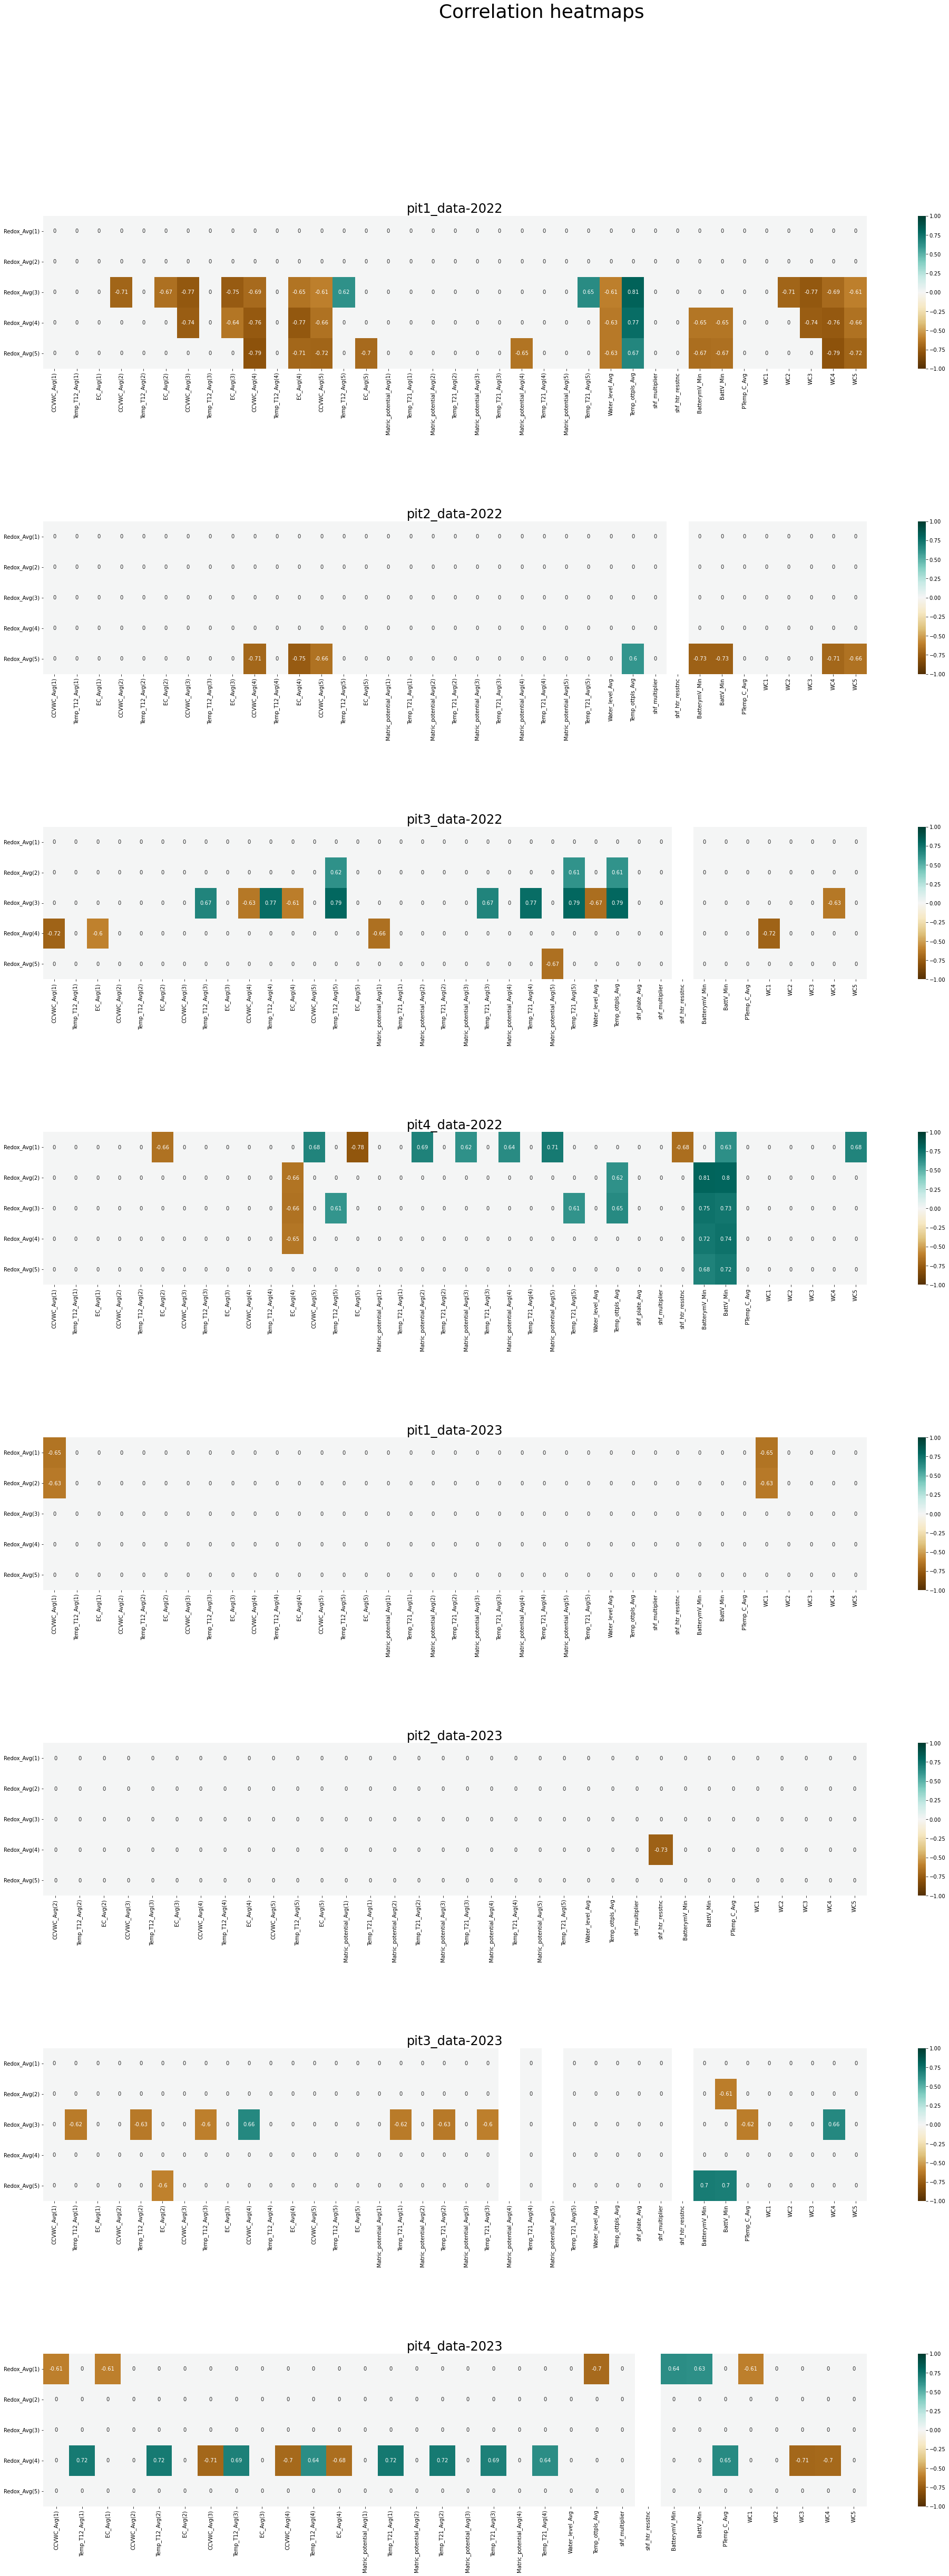

In [12]:
def get_corr_metrics(s: pd.Series, val: float) -> pd.Series:
    for i, x in enumerate(s.values):
        if x < val and x > -val:
            s[i] = 0
    return s

def get_df_corr(df: pd.DataFrame) -> pd.DataFrame:
    # Select numerical parameters
    corr_df = df.select_dtypes(exclude=['bool']).corr()

    # Select Redox_Avg as Y axis and other than Redox_Avg as X axis
    corr_df = corr_df.loc[['Redox_Avg(1)', 'Redox_Avg(2)', 'Redox_Avg(3)', 'Redox_Avg(4)', 'Redox_Avg(5)']].iloc[:,6:]
    return corr_df

ncols = 1
nrows = len(raw_data.keys())

plt.figure(figsize=(35,nrows*10))
plt.subplots_adjust(hspace=1.0)
plt.suptitle("Correlation heatmaps", fontsize=36, y=0.95)


for n, (d_name, df) in enumerate(raw_data.items()):
    ax = plt.subplot(nrows, ncols, n + 1)


    corr_df = get_df_corr(df)
    corr_df = corr_df.apply(lambda x: get_corr_metrics(x, 0.6))

    sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)

    ax.set_title(d_name, fontsize = 24)

### Get values according to findigs csv rows

In [11]:
# start = 11559 - 2 
# end = 11582 - 1
# pit = 'VII_PIT4_2022'
# clean_data[pit][clean_data[pit]['TIMESTAMP'].duplicated() == True]
# clean_data[pit]['TIMESTAMP'].iloc[start:end]